In [5]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

cleansed_path = 'cleansed_data.json'
raw_path = 'raw_data.json'
with open(raw_path, 'r') as f:
    raw_data = json.load(f)
with open(cleansed_path, 'r') as f:
    cleansed_data = json.load(f)

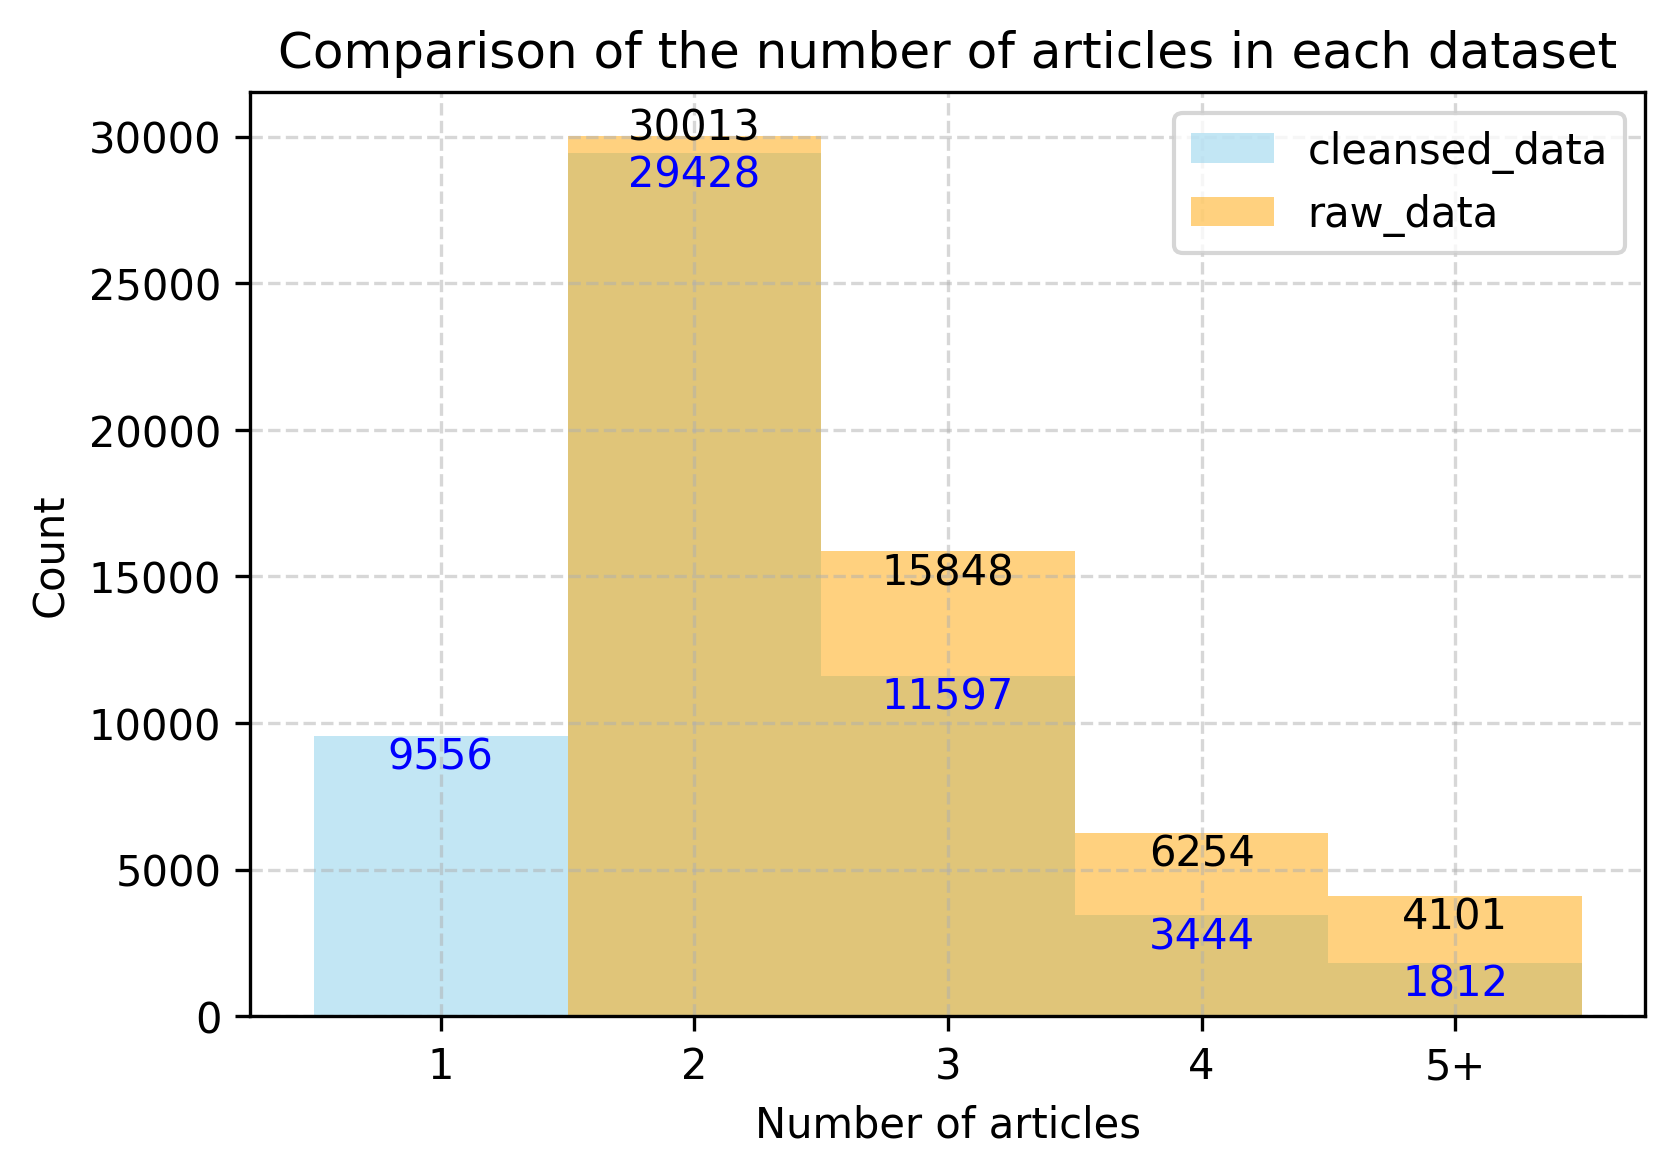

126039 153091


In [18]:
# Read the "document_num" in cleansed_data and raw_data and compare them by drawing a histogram.

cleansed_document_num = [int(data['document_num']) for data in cleansed_data]
raw_document_num = [int(data['document_num']) for data in raw_data]

# Gather document_num >=5 to one group
# Change the "5" to "5+" in the x-axis
# cleansed_document_num = [str(num) if num < 5 else '5+' for num in cleansed_document_num]
# raw_document_num = [str(num) if num < 5 else '5+' for num in raw_document_num]

cleansed_document_num = [num if num < 5 else 5 for num in cleansed_document_num]
raw_document_num = [num if num < 5 else 5 for num in raw_document_num]

# Sort the x-axis
cleansed_document_num.sort()
raw_document_num.sort()
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plt.figure(figsize=(6, 4), dpi=300)

n_cleansed, bins_cleansed, patches_cleansed = plt.hist(cleansed_document_num, bins=bins, alpha=0.5, label='cleansed_data', align='mid', color='skyblue')
n_raw, bins_raw, patches_raw = plt.hist(raw_document_num, bins=bins, alpha=0.5, label='raw_data', align='mid', color='orange')

# Define the offset
offset = max(n_cleansed.max(), n_raw.max()) * 0.02  # 2% of the max height

# Add text on top of the bars for cleansed data
for i in range(len(patches_cleansed)):
    bin_center = (bins_cleansed[i] + bins_cleansed[i+1]) / 2
    count = n_cleansed[i]
    plt.text(bin_center, count, str(int(count)), ha='center', va='top', color='blue')

# Add text on top of the bars for raw data
for i in range(len(patches_raw)):
    bin_center = (bins_raw[i] + bins_raw[i+1]) / 2
    count = n_raw[i]
    if i == 0:
        continue
    if i == 1:
        plt.text(bin_center, count+1000, str(int(count)), ha='center', va='top') # avoid overlapping
    else:
        plt.text(bin_center, count, str(int(count)), ha='center', va='top')

# Correcting the x-ticks. We need 6 locations for the 5 labels and the '5+' label.
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5+'])

# Gray dotted line background
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Comparison of the number of articles in each dataset')
plt.xlabel('Number of articles')
plt.ylabel('Count')
plt.legend()
plt.show()

print(sum(cleansed_document_num), sum(raw_document_num))

In [17]:
# Print the difference per each split

cleansed_sum = {
    'train': 0,
    'val': 0,
    'test': 0
}

raw_sum = {
    'train': 0,
    'val': 0,
    'test': 0
}

for i in range(0, len(cleansed_data)):
    cleansed_sum[cleansed_data[i]['split']] += cleansed_data[i]['document_num']
for i in range(0, len(raw_data)):
    raw_sum[raw_data[i]['split']] += raw_data[i]['document_num']

print(cleansed_sum)
print(raw_sum)

{'train': 102057, 'val': 12509, 'test': 12703}
{'train': 125417, 'val': 15367, 'test': 15505}
